##Transfer Learning MNIST

- Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
- Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

**Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9¶**
- Import the mnist dataset from keras datasets



In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
% matplotlib inline
import vis

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K

Using TensorFlow backend.


## Creating two datasets one with digits below 5 and one with 5 and above

In [0]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

11493376/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gt5 = x_train[y_train >= 5]
y_train_gt5 = y_train[y_train >= 5] - 5  # make classes start at 0 for
x_test_gt5 = x_test[y_test >= 5]         # np_utils.to_categorical
y_test_gt5 = y_test[y_test >= 5] - 5

##Check 

Verify shapes of x_train, y_train, x_test and y_test for both the datasets with the below given shapes.

In [6]:
print(x_train_lt5, y_train_lt5, x_test_lt5, y_test_lt5)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [0 4 1 ... 2 1 3] [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0

In [7]:
print(x_train_lt5.shape)
print(y_train_lt5.shape)
print(x_test_lt5.shape)
print(y_test_lt5.shape)

(30596, 28, 28)
(30596,)
(5139, 28, 28)
(5139,)


In [8]:
print(x_train_gt5.shape)
print(y_train_gt5.shape)
print(x_test_gt5.shape)
print(y_test_gt5.shape)

(29404, 28, 28)
(29404,)
(4861, 28, 28)
(4861,)


## Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST

## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

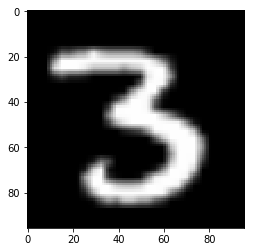

In [9]:
from skimage.transform import resize
def resize_image(image):
    return resize(image, (96,96,3), mode="symmetric")
plt.imshow(resize_image(x_train_lt5[9]));

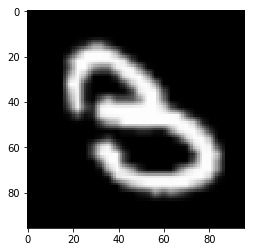

In [10]:
plt.imshow(resize_image(x_test_lt5[9]));

In [0]:
x_train_conv = x_train_lt5.reshape(x_train_lt5.shape[0], 28, 28, 1)
x_test_conv = x_test_lt5.reshape(x_test_lt5.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

## Change into float32 datatype and Normalize x_train and x_test by dividing it by 255.0


In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255
x_test_conv = x_test_conv.astype("float32") / 255

## Check

Verify the shapes of the X_train and X_test with the shapes given below.

In [14]:
print('X_train shape:', x_train_lt5.shape)
print('X_test shape:', x_test_lt5.shape)

X_train shape: (30596, 28, 28)
X_test shape: (5139, 28, 28)


## Use One-hot encoding to divide y_train and y_test into required no of output classes


In [0]:
y_train_class = keras.utils.to_categorical(y_train_lt5, 5)
y_test_class = keras.utils.to_categorical(y_test_lt5, 5)

## Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4

In [16]:
cnn_1 = Sequential()
cnn_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), name='conv_1'))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), name='conv_2'))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_1.add(Dropout(0.25))


W0714 14:13:00.548815 140369271768960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 14:13:00.600287 140369271768960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 14:13:00.609385 140369271768960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 14:13:00.658692 140369271768960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0714 14:13:00.679041 140369271768960 deprecation_wrapp

## Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary

In [0]:
cnn_1.add(Flatten())
cnn_1.add(Dense(128, activation='relu', name='dense_1'))
cnn_1.add(Dense(5, activation='softmax', name='dense_2'))

## Print the training and test accuracy for 5 epochs


In [18]:
cnn_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

In [19]:
cnn_1.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

W0714 14:14:33.622462 140369271768960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 14:14:33.650877 140369271768960 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
model_1 = cnn_1.fit(x_train_conv, y_train_class, 
                     validation_data=(x_test_conv, y_test_class),        
                     batch_size=512, epochs=5)

W0714 14:15:24.813839 140369271768960 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 19s 626us/step - loss: 0.3915 - acc: 0.8978 - val_loss: 0.0551 - val_acc: 0.9837
Epoch 2/5
30596/30596 [==============================] - 18s 596us/step - loss: 0.0643 - acc: 0.9807 - val_loss: 0.0294 - val_acc: 0.9910
Epoch 3/5
30596/30596 [==============================] - 18s 596us/step - loss: 0.0439 - acc: 0.9862 - val_loss: 0.0178 - val_acc: 0.9947
Epoch 4/5
30596/30596 [==============================] - 18s 597us/step - loss: 0.0340 - acc: 0.9899 - val_loss: 0.0134 - val_acc: 0.9951
Epoch 5/5
30596/30596 [==============================] - 18s 596us/step - loss: 0.0284 - acc: 0.9913 - val_loss: 0.0114 - val_acc: 0.9963


## Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9 (Using Transfer learning keeping only the dense layers to be trainable)

- Make only the dense layers to be trainable and convolutional layers to be non-trainable
- Check model summary to see model layer names

In [21]:
for layers in cnn_1.layers:
    print(layers.name)
    if('dense' not in layers.name):
        layers.trainable = False
        print(layers.name + 'is not trainable\n')
    if('dense' in layers.name):
        print(layers.name + ' is trainable\n')

conv_1
conv_1is not trainable

max_pooling2d_1
max_pooling2d_1is not trainable

conv_2
conv_2is not trainable

max_pooling2d_2
max_pooling2d_2is not trainable

dropout_1
dropout_1is not trainable

flatten_1
flatten_1is not trainable

dense_1
dense_1 is trainable

dense_2
dense_2 is trainable



## Do the required preprocessing for x_train_gt5 also same as x_train_lt5 and for y_train_gt5 same as y_train_lt5
1. Reshape
2. Change to float32 datatype
3. Normalize (dividing with 255)
4. y_train and y_test Convert into one-hot vectors

In [0]:
x_train_conv = x_train_gt5.reshape(x_train_gt5.shape[0], 28, 28, 1)
x_test_conv = x_test_gt5.reshape(x_test_gt5.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train_conv =  x_train_conv.astype("float32") / 255
x_test_conv = x_test_conv.astype("float32") / 255

y_train_class = keras.utils.to_categorical(y_train_gt5, 5)
y_test_class = keras.utils.to_categorical(y_test_gt5, 5)

In [23]:
cnn_1.fit(x_train_conv, y_train_class, 
                     validation_data=(x_test_conv, y_test_class),        
                     batch_size=512, epochs=5)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 29404 samples, validate on 4861 samples
Epoch 1/5
29404/29404 [==============================] - 17s 592us/step - loss: 0.4618 - acc: 0.8744 - val_loss: 0.0826 - val_acc: 0.9741
Epoch 2/5
29404/29404 [==============================] - 17s 591us/step - loss: 0.0917 - acc: 0.9703 - val_loss: 0.0519 - val_acc: 0.9831
Epoch 3/5
29404/29404 [==============================] - 17s 593us/step - loss: 0.0668 - acc: 0.9784 - val_loss: 0.0398 - val_acc: 0.9883
Epoch 4/5
29404/29404 [==============================] - 17s 591us/step - loss: 0.0546 - acc: 0.9820 - val_loss: 0.0332 - val_acc: 0.9887
Epoch 5/5
29404/29404 [==============================] - 17s 591us/step - loss: 0.0479 - acc: 0.9849 - val_loss: 0.0305 - val_acc: 0.9893


## Check

Verify the shapes with the given below.



In [24]:
print(x_train_gt5.shape)
print(y_train_gt5.shape)
print(x_test_gt5.shape)
print(y_test_gt5.shape)

(29404, 28, 28)
(29404,)
(4861, 28, 28)
(4861,)


## Print the accuracy for classification of digits 5 to 9


In [25]:
score = cnn_1.evaluate(x_test_conv, y_test_class)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4861/4861 [==============================] - 1s 232us/step
Test loss: 0.030512396862733833
Test accuracy: 0.9893026125207895


## Text classification using TF-IDF

Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

## Training data

In [0]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

## Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

- You can access the values for the target variable using .target attribute
- You can access the name of the class in the target variable with .target_names

In [41]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [42]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [43]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

## Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
def print_report(pipe):
    y_test = twenty_test.target
    y_pred = pipe.predict(twenty_test.data)
    report = metrics.classification_report(y_test, y_pred,
        target_names=twenty_test.target_names)
    print(report)
    print("accuracy: {:0.3f}".format(metrics.accuracy_score(y_test, y_pred)))

In [0]:
vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.95)
train_data = vectorizer.fit_transform(twenty_train.data)
test_data = vectorizer.transform(twenty_test.data)
train_labels =twenty_train.target
test_labels = twenty_test.target

## Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [0]:
from sklearn.linear_model import LogisticRegression

In [47]:
logreg = LogisticRegression(C=1e9)
logreg.fit(train_data, train_labels)
logreg.score(test_data,test_labels)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8948069241011984